In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [2]:
delta = 0.01

@widgets.interact(n=(10, 100, 1))
def plot_fig(n=10):
    k = np.linspace(10, 100, 98)
    conf = 1-(k/(k-1))**n*delta
    plt.plot(k, conf)
    plt.ylim(0,1)
    plt.xlabel('k')
    # plt.axvline(x=np.log(n), color='r', linestyle='--')
    plt.axhline(0.9, color='r', linestyle='--')
    for i in range(len(conf)):
        if conf[i] >= 0.9:
            plt.axvline(x=k[i], color='b', linestyle='--')
            break
    plt.ylabel('conf')

interactive(children=(IntSlider(value=10, description='n', min=10), Output()), _dom_classes=('widget-interact'…

In [26]:
delta = 0.01

@widgets.interact(k=(10, 100, 1))
def plot_fig(k=10):
    n = np.linspace(10, 100, 98)
    conf = 1-(k/(k-1))**n*delta
    plt.plot(n, conf)
    plt.xlabel('n')
    plt.ylabel('conf')

interactive(children=(IntSlider(value=10, description='k', min=10), Output()), _dom_classes=('widget-interact'…

Automatically created module for IPython interactive environment


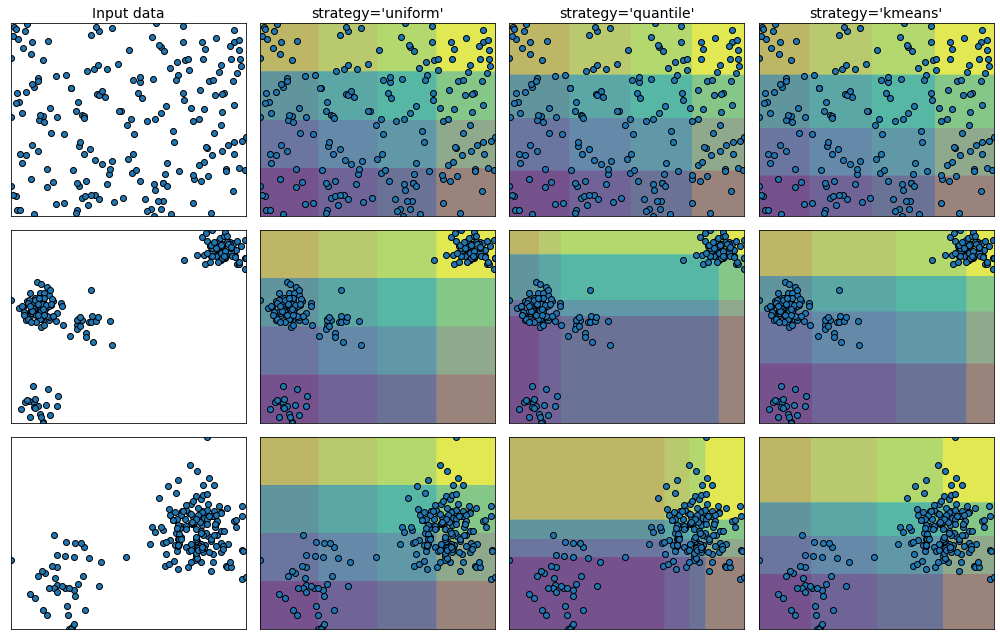

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import make_blobs

print(__doc__)

strategies = ['uniform', 'quantile', 'kmeans']

n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

# construct the datasets
random_state = 42
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(n_samples=[n_samples // 10, n_samples * 4 // 10,
                          n_samples // 10, n_samples * 4 // 10],
               cluster_std=0.5, centers=centers_0,
               random_state=random_state)[0],
    make_blobs(n_samples=[n_samples // 5, n_samples * 4 // 5],
               cluster_std=0.5, centers=centers_1,
               random_state=random_state)[0],
]

figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):

    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy, ), size=14)

        i += 1

plt.tight_layout()
plt.show()

In [21]:
X = np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2))
xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300))
grid = np.c_[xx.ravel(), yy.ravel()]

In [22]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [23]:
enc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=4)

In [27]:
X_ = enc.transform(grid)
X_.shape

(90000, 2)

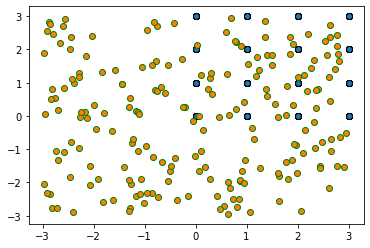

In [24]:
X_ = enc.transform(grid)

plt.scatter(X_[:, 0], X_[:, 1], edgecolors='k')
# plt.scatter(X[:, 0], X[:, 1], edgecolors='g')